## Lecture DFT 1
---

- [Introduction](#Introduction)
- [Sampling of continuous time functions](#Sampling-of-continuous-time-functions)
- [Base functions for the DFT](#Base-functions-for-the-DFT)
- [The Discrete Fourier Transform (DFT)](#The-Discrete-Fourier-Transform-(DFT))

#### Introduction
---

This chapter introduces the **Discrete Fourier transform (DFT)**, which is the discrete analogue
of the Fourier series. In the first section you will first learn how to discretize (sample) continuous functions. 
Then you got to know the base functions for the DFT, i.e.
sampled Sine and Cosine functions. Finally we will introduce and discuss the DFT.

#### Sampling of continuous time functions
---

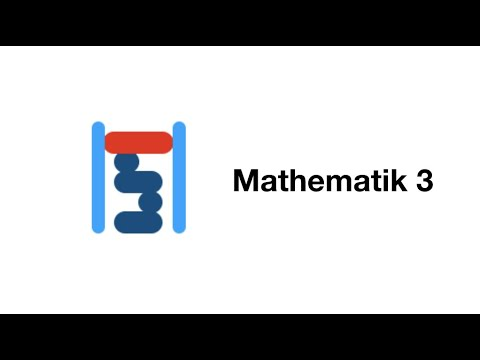

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('x7qdIvvLc6s', width=380, height=220)

Suppose we have (as shown in the figure below) a continuous function $f(t)$. Now we discretize the time axis 
with equidistant intervals
$$
t_k = \frac{T}{N}k,\quad k = 0,1,2,\ldots,N-1\, .
$$
The time $\Delta T$ between to **samples** is given by
$$
\Delta t = \frac{T}{N},\qquad f_s = \frac{1}{\Delta t} = \frac{N}{T}\,.
$$
$f_s$ is called **sample frequency**.
The discrete vector $f_k, k=0,1,2,\ldots,N-1$ is generated by sampling $f(t)$ at the times $t_k$, i.e.
$$
f_k = f(t_k) = f\left(\frac{T}{N}k\right),\quad k = 0,1,2,\ldots,N-1\,.
$$
The signal is then periodically continued, i.e.
$$
f_0 = f_N\,.
$$
The following example shows a signal with $T=2$, that is sampled with $f_s=4$ (hence $N=f_s\cdot T =8$).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some signal f(t)
T = 2
omega = 2*np.pi/T
t_p = np.linspace(0,T,100)
s = np.array([1, -0.5, -0.1,0.1,0.2])
f = 0
for n,c in enumerate(s):
    f = f + c*np.sin(omega*(n+1)*t_p)+c*np.cos(omega*(n+1)*t_p)

# Generate the DFT points
f_s = 4
N = f_s*T
t = np.arange(0,T,T/N)
f_dft = 0
for n,c in enumerate(s):
    f_dft = f_dft + c*np.sin(omega*(n+1)*t)+c*np.cos(omega*(n+1)*t)

plt.plot(t_p,f,label='f(t)')
plt.plot(t,f_dft,'o',label='f(t_k)=f_k')
plt.grid()
plt.ylabel('f(t), f_k')
plt.xlabel('t,t_k')
plt.legend()

f_dft.reshape(N,1)

array([[ 0.7       ],
       [ 0.53137085],
       [ 1.9       ],
       [ 0.25857864],
       [-1.5       ],
       [-1.73137085],
       [-0.7       ],
       [ 0.54142136]])

#### Base functions for the DFT
---

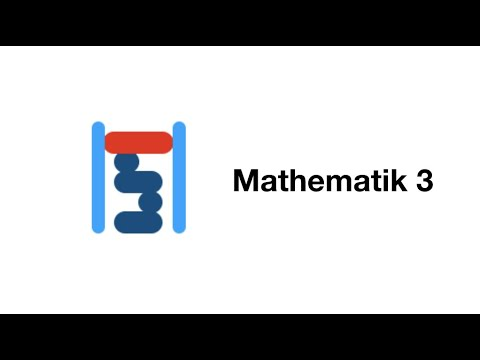

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('FpjfSWP4xjc', width=380, height=220)

Reminder: In case of the Fourier series
$$
f(t) = \sum_{n=\infty}^{\infty}c_n e^{i\left(\frac{2\pi}{T}n\right) t}
$$
the functions
$$
b_n(t) = e^{i\left(\frac{2\pi}{T}n\right) t} = \cos\left(\frac{2\pi}{T}nt\right) + i \sin\left(\frac{2\pi}{T}n t\right)
$$
form an orthonormal basis. It is
$$
b_{-n} = \bar{b_n}
$$. 

These continuouos functions in the intervall $[0,T]$ 
are now replaced by their discrete version
$$
b_n = e^{i\left(\frac{2\pi}{T}n\right) t_k} = e^{i\left(\frac{2\pi}{N}n\right) k},\quad k = 0,1,2,\ldots,N-1, \quad n = 0,1,2,\ldots,N-1\,,
$$
i.e. sampled sine and cosine functions. These base vectors fulfill the following property
$$
(a)\, b_{n+N} = b_n \qquad \quad   (a)\,b_{N-n} = \bar{b}_n = b_{-n}
$$
The base functions are shown in the figure below.

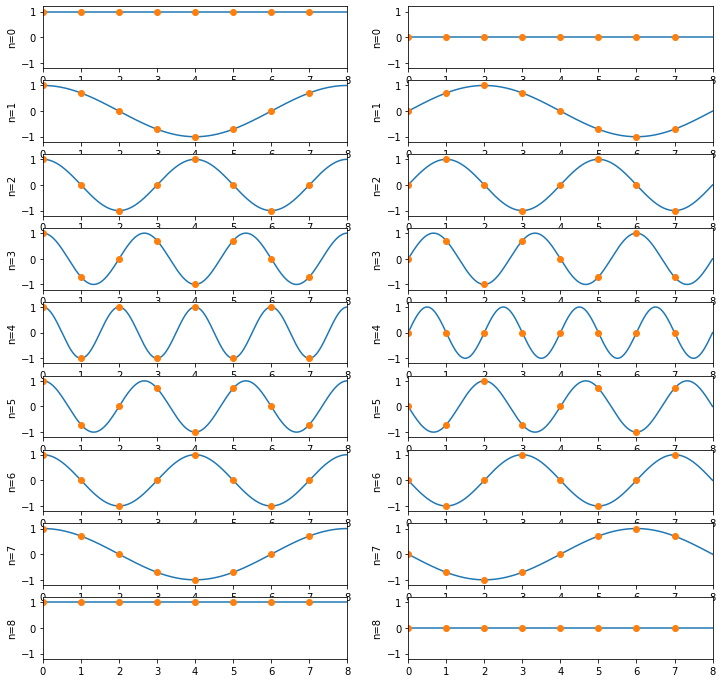

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
t = np.linspace(0,N,1000)
k = np.arange(0,N)

plt.figure(figsize=(12,12))
for n in range(N+1):
    plt.subplot(N+1, 2 , 2*(n+1)) 
    if n<=N/2:
        plt.plot(t,np.sin(2*np.pi/N*n*t))
        plt.plot(k,np.sin(2*np.pi/N*n*k),'o')
        plt.axis([0, N, -1.2, 1.2])
        plt.ylabel('n={}'.format(n))
    else:
        plt.plot(t,-np.sin(2*np.pi/N*(N-n)*t))
        plt.plot(k,np.sin(2*np.pi/N*n*k),'o')
        plt.axis([0, N, -1.2, 1.2])
        plt.ylabel('n={}'.format(n))

    plt.subplot(N+1, 2 , 2*n+1) 
    if n<=N/2:
        plt.plot(t,np.cos(2*np.pi/N*n*t))
        plt.plot(k,np.cos(2*np.pi/N*n*k),'o')
        plt.axis([0, N, -1.2, 1.2])
        plt.ylabel('n={}'.format(n))
    else:
        plt.plot(t,np.cos(2*np.pi/N*(N-n)*t))
        plt.plot(k,np.cos(2*np.pi/N*n*k),'o')
        plt.axis([0, N, -1.2, 1.2])
        plt.ylabel('n={}'.format(n))

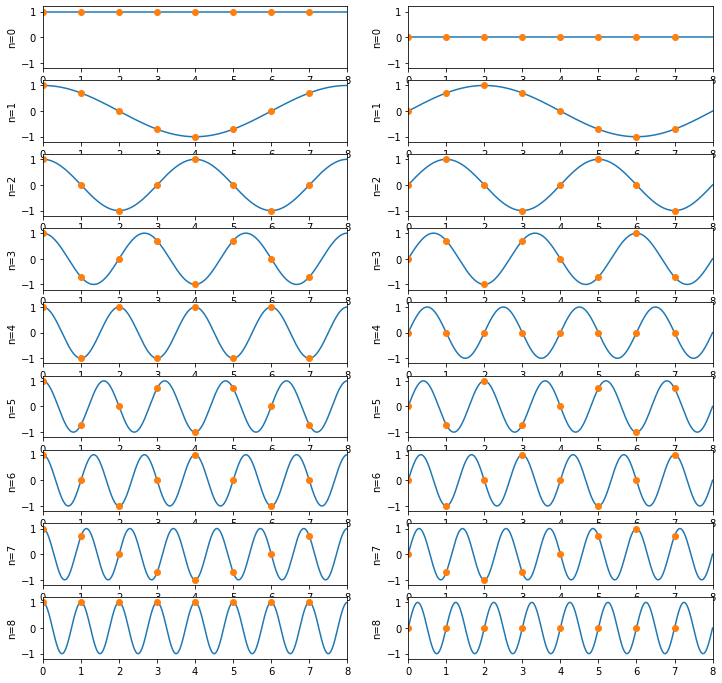

In [12]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
t = np.linspace(0,N,1000)
k = np.arange(0,N)

plt.figure(figsize=(12,12))
for n in range(N+1):
    plt.subplot(N+1, 2 , 2*(n+1)) 
    
    plt.plot(t,np.sin(2*np.pi/N*n*t))
    plt.plot(k,np.sin(2*np.pi/N*n*k),'o')
    plt.axis([0, N, -1.2, 1.2])
    plt.ylabel('n={}'.format(n))
    

    plt.subplot(N+1, 2 , 2*n+1) 
    
    plt.plot(t,np.cos(2*np.pi/N*n*t))
    plt.plot(k,np.cos(2*np.pi/N*n*k),'o')
    plt.axis([0, N, -1.2, 1.2])
    plt.ylabel('n={}'.format(n))
    

What is the maximum resolvable frequency? Due to the property $b_{N-n} = \bar{b}_n$ the highest index is given by $\frac{N}{2}$ with
corresponding frequency
$$
f_{\mathrm{max}} = \frac{N}{2}\frac{1}{T} = \frac{f_s}{2}\,.
$$  
In the example above where $f_s = 4$ we find $f_{\mathrm{max}}=\frac{4}{2} = 2$.

**Shannon-Nyquist**
$$
f_s \geq 2f_{\mathrm{max}} 
$$
The frequencies of the base function take the following values
$$
\frac{1}{T}n = \frac{f}{N}n, \quad n = -\frac{N}{2},-\frac{N}{2}+1,\ldots, \frac{N}{2}-1
$$

#### The Discrete Fourier Transform (DFT)
---


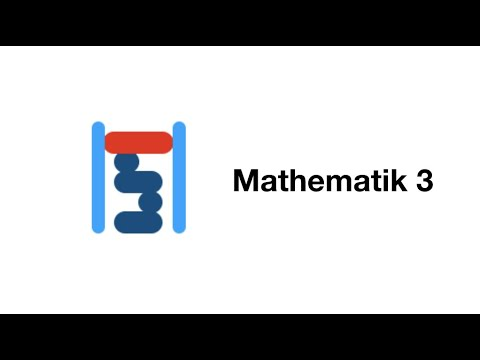

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('kht5jtOrqso', width=380, height=220)

We have
$$
\vec{f} = \frac{1}{N}\sum_{n=0}^{N-1}c_n \vec{b}_n\quad \quad \mathrm{or}\quad f_k = \frac{1}{N}\sum_{n=0}^{N-1}c_n e^{i\frac{2\pi}{N}nk}
$$
or
$$
c_n = \sum_{k=0}^{N-1}f_k e^{-i\frac{2\pi}{N}nk}
$$
For any real signal vector $\vec{f}$ we have
$$
c_{N-n} = \bar{c}_n,\qquad n=0,1,2,\ldots, N-1\,.
$$
We introduce the following short hand notation
$$
w_N = e^{-i\frac{2\pi}{N}} \qquad \Rightarrow \qquad  e^{-i\frac{2\pi}{N}nk} = w_N^{nk} \,.
$$
With this definition we may write
$$
\vec{c} = \mathbf{W}\vec{f},\qquad  \vec{f} = \frac{1}{N}\mathbf{W}^{-1}\vec{c}
$$
where the DFT-matrix $\mathbf{W}$ and its inverse $\mathbf{W}^{-1}$ are given by
$$
\mathbf{W}_{ij} = w_N^{ij}\qquad \quad \mathbf{W}^{-1} = \bar{\mathbf{W}}\,.
$$